# view the data gathered

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
datapath="C:/Users/dexte/Documents/GitHub/3D-textures/"

def get_friction(trial1_forces,trial2_forces,trial3_forces,mass):
    mass=mass/1000 #convert to kg
    gf_to_N = lambda arr: [f * 0.00981 for f in arr]
    all_forces = np.concatenate([gf_to_N(trial1_forces[10:-5]),gf_to_N(trial2_forces[10:-5]),gf_to_N(trial3_forces[10:-5])]).reshape((3,len(gf_to_N(trial1_forces[10:-5]))))
    avg_force = np.mean(all_forces,axis=0)
    error = np.std(avg_force)
    avg_force = np.mean(avg_force)
    # Compute normal force (assuming gravity = 9.81 m/s²)
    normal_force = mass * 9.81

    # Return coefficient of friction
    mu = avg_force / normal_force
    return mu, error

## load in

In [3]:
def get_info(file):
    name=file.split("/")[-1]
    meta=name.split("_")
    texture=meta[1]
    printer=meta[2]
    filament=meta[3]
    mass=float(meta[4].replace(".csv",""))
    df=pd.read_csv(file)
    friction,error=get_friction(df['Trial 1 Force'],df['Trial 2 Force'],df['Trial 3 Force'],mass)
    return df, friction,texture,error,printer,filament



In [8]:
directory=datapath+"Friction/data/3dprinted/"
files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

d={"Textures":[],"Frictions":[],"Error":[],"Printer":[],"Filament":[]}

for file in files:
    df,friction,texture,error,prin,fil=get_info(directory+file)
    d["Textures"].append(texture)
    d["Frictions"].append(friction)
    d["Printer"].append(prin)
    d["Filament"].append(fil)
    d['Error'].append(error)

d=pd.DataFrame(d)
print(d)

d.to_csv("C:/Users/dexte/Documents/GitHub/3D-textures/Friction/data/fritions3D.csv")

   Textures  Frictions     Error   Printer  Filament
0        z0   0.005114  0.007123     bambu  PLAminus
1        z0  -0.083797  0.008498     bambu   PLAplus
2        z0  -0.024876  0.005631     bambu      wood
3        z0  -0.023418  0.006275  creality  Plaminus
4        z0  -0.148963  0.007754  creality   Plaplus
5        z0  -0.047596  0.009039     ender  PLAminus
6        z0  -0.028387  0.032464     ender   PLAplus
7        z1  -0.028739  0.005941     bambu  PLAminus
8        z1   0.020039  0.004263     bambu   PLAplus
9        z1   0.045398  0.005038     bambu      wood
10       z1   0.023409  0.006924  creality  Plaminus
11       z1  -0.175561  0.030766  creality   Plaplus
12       z1  -0.019654  0.006944     ender  PLAminus
13       z1   0.021971  0.009684     ender   PLAplus
14       z2   0.056797  0.006284     bambu  PLAminus
15       z2   0.015122  0.007300     bambu   PLAplus
16       z2   0.035883  0.004173     bambu      wood
17       z2  -0.158078  0.010217  creality  PL

## visualise

C:\Users\dexte\AppData\Local\Temp\ipykernel_34048\826216190.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


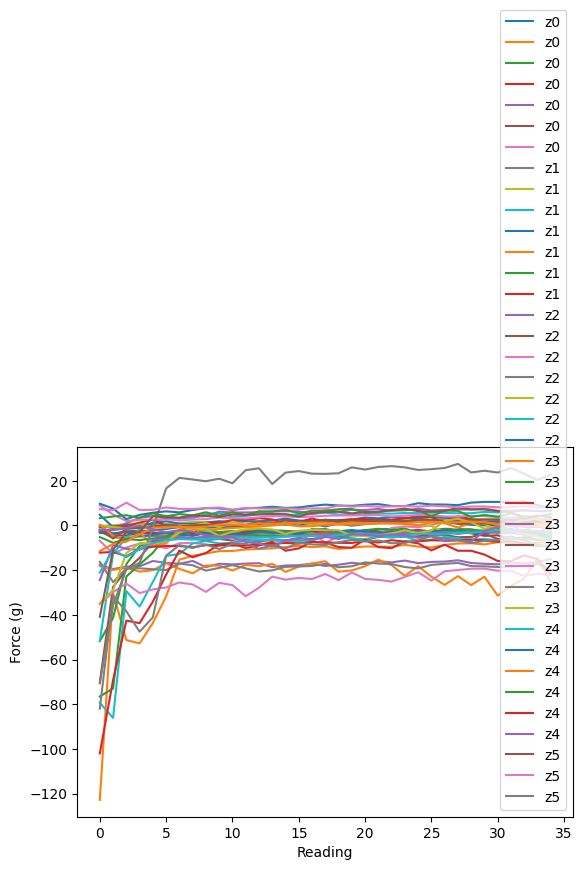

In [5]:
for file in files:
    df,friction,texture,_,_,_=get_info(directory+file)
    average=np.average(df[['Trial 1 Force','Trial 2 Force','Trial 3 Force']],axis=1)
    plt.plot(average,label=texture)
plt.legend(loc="lower right")
plt.tight_layout()
plt.xlabel("Reading")
plt.ylabel("Force (g)")
plt.show()

In [6]:
old=pd.read_csv("C:/Users/dexte/Documents/GitHub/3D-textures/Friction/olddata/data.csv")

current=d.sort_values(by="Frictions")
name_list = current['Textures'].tolist()

for i in range(len(current['Frictions'])):
    value = current[current['Textures'] == name_list[i]]['Frictions'].values[0]
    old_fric=old[old['Textures'] == name_list[i]]['Frictions'].values[0]
    plt.scatter(i,value,c="b")
    if old_fric!=0:
        plt.scatter(i,old_fric,c="r")

plt.scatter(i,value,c="b",label="new")
plt.scatter(i,old_fric,c="r",label="old")
plt.xticks([i for i in range(len(current['Frictions']))],name_list,rotation="vertical")
plt.xlabel("Texture")
plt.legend(loc="lower right")
plt.ylabel("Coefficient of Friction")
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0